# Lab 1

In [13]:
%%capture
import sys
!{sys.executable} -m pip install --user scipy numpy matplotlib pandas

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', size=22)
matplotlib.rc('figure', figsize=(18, 10))

import numpy as np
import pandas as pd
from scipy import stats

## Standard Normal Distribution, μ=0, σ=1

The standard normal distribution is the Gaussian distribution of a random variable of mean $\mu=0$ and standard deviation $\sigma=1$. When a value lies outside the mean, the distance from the mean to the value can be expressed as a multiple of the standard deviation, usually called the "z-score". Thus a value with a "z-score of 2" or one that lies "2 sigma" from the mean corresponds to the point located $2\sigma$ from $\mu$.

The probability that a number from the distribution lies within a particular range of z-scores is found by integrating the Gaussian function from one z-score to the other. For example, the probability that a value lies $1\sigma$ from the mean is the integral of the standard normal probability density function (PDF) from -1 to 1. Similarly, since the integral over the entire PDF is equal to 1, the probability that a value lies within $-\infty\sigma$ to $+\infty\sigma$ is 100%.

Integrating Gaussian PDFs is usually not a pleasant task, so values for various z-scores have been tabulated. The following is a Z table for the standard normal distribution, which gives the probability that a value may lie between 0 and z. The far left column is the larger portion of the z-score, and the upper row is the smaller portion. To find the probability that a value lies within 0 and 0.75, for example, we locate the element of the table at row 8 (0.7), column 6 (0.05), which is 0.27337. Thus the probability is about 27%.

| z   | +0.00   | +0.01   | +0.02   | +0.03   | +0.04   | +0.05   | +0.06   | +0.07   | +0.08   | +0.09   |
|-----|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
| 0.0 | 0.00000 | 0.00399 | 0.00798 | 0.01197 | 0.01595 | 0.01994 | 0.02392 | 0.02790 | 0.03188 | 0.03586 |
| 0.1 | 0.03983 | 0.04380 | 0.04776 | 0.05172 | 0.05567 | 0.05962 | 0.06356 | 0.06749 | 0.07142 | 0.07535 |
| 0.2 | 0.07926 | 0.08317 | 0.08706 | 0.09095 | 0.09483 | 0.09871 | 0.10257 | 0.10642 | 0.11026 | 0.11409 |
| 0.3 | 0.11791 | 0.12172 | 0.12552 | 0.12930 | 0.13307 | 0.13683 | 0.14058 | 0.14431 | 0.14803 | 0.15173 |
| 0.4 | 0.15542 | 0.15910 | 0.16276 | 0.16640 | 0.17003 | 0.17364 | 0.17724 | 0.18082 | 0.18439 | 0.18793 |
| 0.5 | 0.19146 | 0.19497 | 0.19847 | 0.20194 | 0.20540 | 0.20884 | 0.21226 | 0.21566 | 0.21904 | 0.22240 |
| 0.6 | 0.22575 | 0.22907 | 0.23237 | 0.23565 | 0.23891 | 0.24215 | 0.24537 | 0.24857 | 0.25175 | 0.25490 |
| 0.7 | 0.25804 | 0.26115 | 0.26424 | 0.26730 | 0.27035 | 0.27337 | 0.27637 | 0.27935 | 0.28230 | 0.28524 |
| 0.8 | 0.28814 | 0.29103 | 0.29389 | 0.29673 | 0.29955 | 0.30234 | 0.30511 | 0.30785 | 0.31057 | 0.31327 |
| 0.9 | 0.31594 | 0.31859 | 0.32121 | 0.32381 | 0.32639 | 0.32894 | 0.33147 | 0.33398 | 0.33646 | 0.33891 |
| 1.0 | 0.34134 | 0.34375 | 0.34614 | 0.34849 | 0.35083 | 0.35314 | 0.35543 | 0.35769 | 0.35993 | 0.36214 |

Source: https://en.wikipedia.org/wiki/Standard_normal_table

Let's replicate this table with Python. SciPy provides us with a *cumulative distribution function* `cdf` that integrates the PDF from $-\infty$ to z. Since we want to integrate from 0 to z, we subtract the integral over $-\infty$ to 0 from the integral over $-\infty$ to z.

In [14]:
large_increments = np.linspace(0, 1, 11)
small_increments = np.linspace(0, 0.09, 10)
table = np.zeros((len(large_increments), len(small_increments)))

for i in range(len(large_increments)):
    for j in range(len(small_increments)):
        table[i][j] = stats.norm.cdf(large_increments[i] + small_increments[j]) - stats.norm.cdf(0)

pd.DataFrame(table, columns=small_increments, index=large_increments)

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.0,0.000000,0.003989,0.007978,0.011966,0.015953,0.019939,0.023922,0.027903,0.031881,0.035856
0.1,0.039828,0.043795,0.047758,0.051717,0.055670,0.059618,0.063559,0.067495,0.071424,0.075345
0.2,0.079260,0.083166,0.087064,0.090954,0.094835,0.098706,0.102568,0.106420,0.110261,0.114092
0.3,0.117911,0.121720,0.125516,0.129300,0.133072,0.136831,0.140576,0.144309,0.148027,0.151732
0.4,0.155422,0.159097,0.162757,0.166402,0.170031,0.173645,0.177242,0.180822,0.184386,0.187933
0.5,0.191462,0.194974,0.198468,0.201944,0.205401,0.208840,0.212260,0.215661,0.219043,0.222405
0.6,0.225747,0.229069,0.232371,0.235653,0.238914,0.242154,0.245373,0.248571,0.251748,0.254903
0.7,0.258036,0.261148,0.264238,0.267305,0.270350,0.273373,0.276373,0.279350,0.282305,0.285236
0.8,0.288145,0.291030,0.293892,0.296731,0.299546,0.302337,0.305105,0.307850,0.310570,0.313267
0.9,0.315940,0.318589,0.321214,0.323814,0.326391,0.328944,0.331472,0.333977,0.336457,0.338913


Now let's convert probabilities to the form $X\sigma$.

The probability that a value that lies $1\sigma$ to the left of the mean is about 0.1587, for $2\sigma$ away it's 0.0227, and for $5\sigma$ away it's 2.8665\*10<sup>-7</sup>. To find the z-score of these probabilities, we use the *percent-point function* `ppf`.

In [15]:
probabilities = np.array([0.1587, 0.0227, 2.8665e-07])
print(stats.norm.ppf(probabilities))

[-0.99981509 -2.00092939 -5.00000106]


Great - these are approximately $1\sigma$, $2\sigma$, and $5\sigma$, as expected. The negative sign on each value indicates that it falls to the left of the mean (which is at 0). Since we're integrating the PDF starting at $-\infty$, we expect to end up on the left of the mean as long as the desired probability is less than 0.5.

## Chi-Squared distribution, k=10

The chi-squared distribution is the sum of the squares of standard normal random variables. A value $A$ in the chi-squared distribution is equal to $\sum\limits_{i=1}^{k} Z_i^2$, where $Z_i$ is the $i^{th}$ standard-normally distributed variable. This distribution is defined by one parameter $k$, which indicates the number of $Z_i$'s to sum over.

First, let's plot a histogram of some chi-squared distributed data, as well as the PDF for the distribution. We'll define our distribution using the parameter $k=10$.

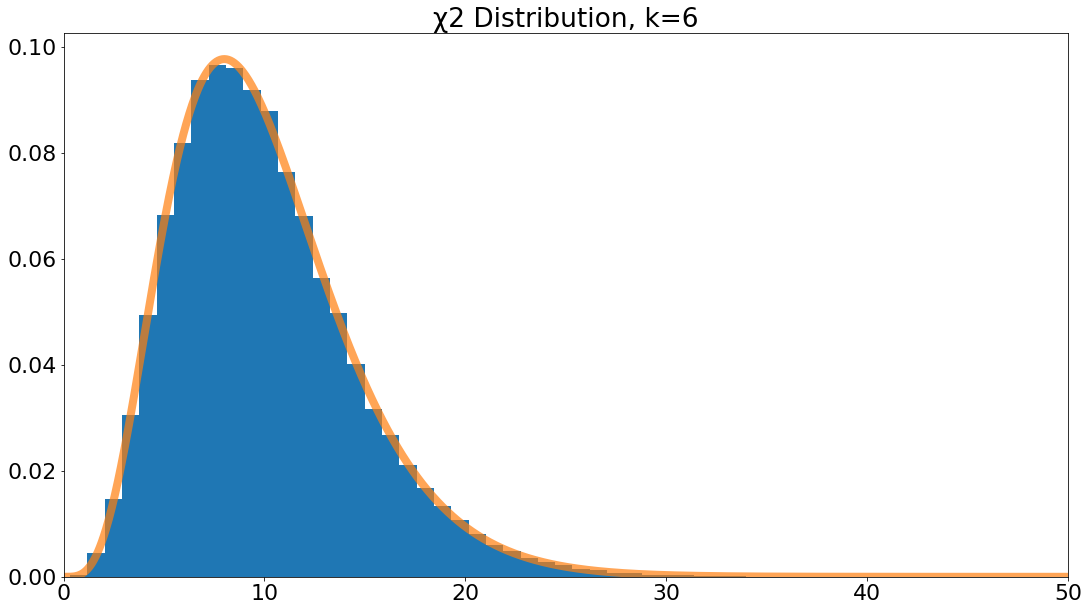

In [16]:
dist = stats.chi2(10)
samples = dist.rvs(100_000)

plt.title("χ2 Distribution, k=6")
plt.hist(samples, 50, density=True)
plt.xlim([0, 50])
x = np.linspace(0, 50, 1000)
plt.plot(x, dist.pdf(x), linewidth = 8, alpha = 0.7);

Now let's examine what it means to find a probability of $X\sigma$ when our data is not Gaussian.

Consider the case of a measurement of some quantity where one may either receive a signal or receive no signal. Let's choose an arbitrary signal threshold for this hypothetical measurement: 10. Thus, a measurement that has the value 10 can be considered "signal-like", with a value less than 10 it is "not signal-like", and with a value greater than 10 it is "more signal-like". Now we can ask a statistical question about the probability of finding a signal in some supposedly signal-free background data:

Given that our signal-free data is chi-squared distributed, what is the probability that we find a value that is as signal-like or more signal-like than 10 in the signal-free data?

We must integrate the PDF for the distribution: $P = \int\limits_{10}^{\infty} \frac{1}{2^{k/2}\Gamma({k/2})}x^{k/2 - 1}e^{-x/2}$ with $k=10$.

Since we want to integrate from 10 to $\infty$, we can use something called the *survival function*, which is defined to be one minus the CDF (that is, it integrates the PDF from z to $\infty$).

In [17]:
dist.sf(10)

0.44049328506521257

This probability is about 12.47%. Let's convert it to the form $X\sigma$ using the `ppf` function.

In [18]:
stats.norm.ppf(dist.sf(10))

-0.14971867956893092

Notice that we're calling the `ppf` function on the *standard normal distribution*, NOT our chi-squared distribution. When we put this probability in the form $X\sigma$, what we really mean is the same probability as if our data were Gaussian. Integrating from $-\infty$ to -1.1520414546415925 (or, equivalently, from -1.1520414546415925 to $\infty$) on a standard normal PDF gives us the *same* probability as integrating our chi-squared PDF from 10 to $\infty$.

Therefore, the probability that we measure a value that is as signal-like or more signal-like than 10 in the signal-free data is said to be $0.15\sigma$.

Let's keep increasing the threshold for what constitutes a signal. This should make the probability drop, and the number of $\sigma$'s should increase, since we will end up further from the mean.

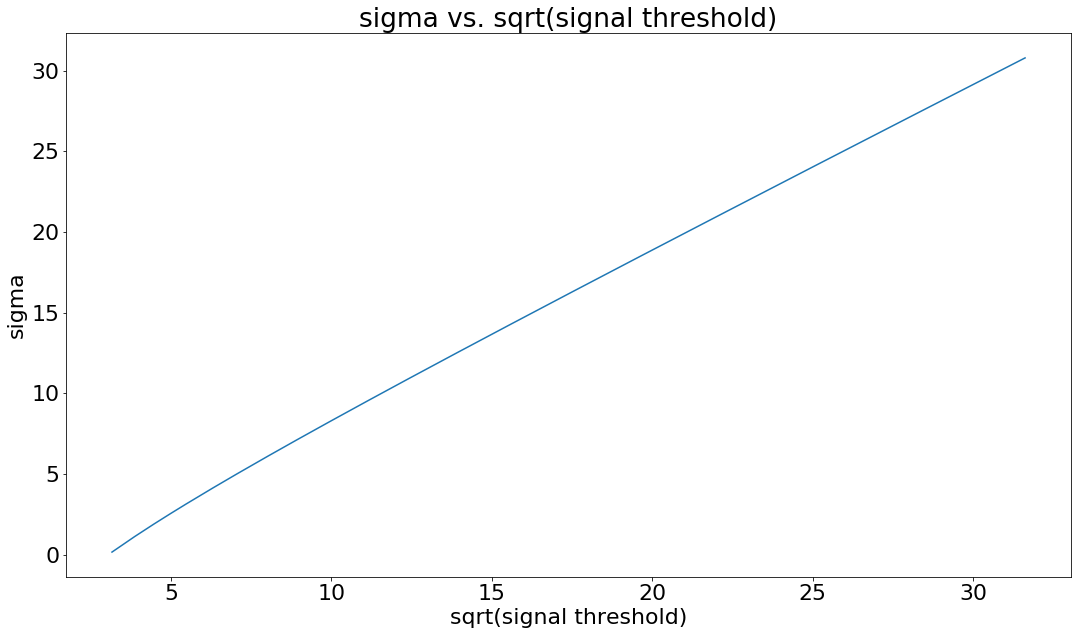

In [19]:
signals = np.linspace(10, 1000, 200)
sigmas = np.abs(stats.norm.ppf(dist.sf(signals)))

plt.title("sigma vs. sqrt(signal threshold)")
plt.xlabel("sqrt(signal threshold)")
plt.ylabel("sigma")
plt.plot(np.sqrt(signals), sigmas);

This plot tells us that the probability (expressed as $X\sigma$) of finding a data point that is as signal-like or more signal-like than some signal threshold is linearly related to the square root of the threshold. This makes sense, because the square root of a chi-squared distribution looks like a normal distribution. The above relationship is linear because a normally-distributed signal that is twice as far away from the mean will have a z-score that is twice as large.

## Binomial Distribution

The binomial distribution is a discrete distribution, frequently used to model the probability of some "success" for $n$ independent trials, where success is some boolean value. Examples range widely from flipping a coin to statistical mechanics. The binomial distribution gives us a *probability mass function* that we can use to calculate the probability of some number of successes $k$ in $n$ trials, where $p$ is the probability of success for any given trial.

Let's use the coin-flipping example, since it's relatively simple. Let's say we flip a coin 20 times, and each independent trial has a 0.5 probability of landing heads or tails. Since the probability for either outcome is the same, we'll arbitrarily define "success" to mean we landed on heads.

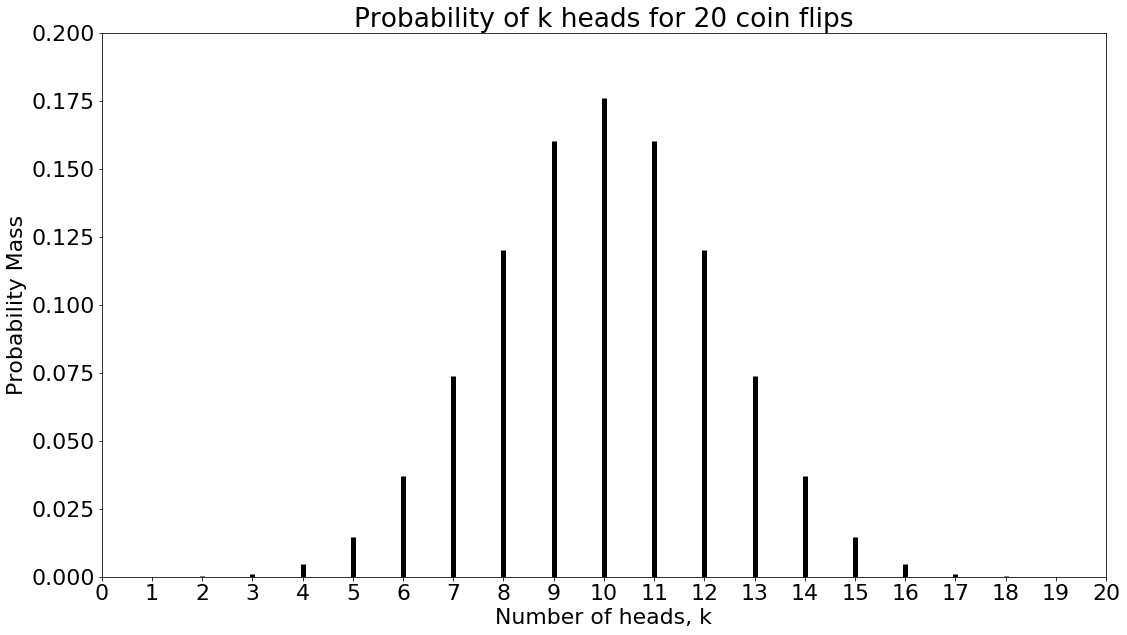

In [29]:
dist = stats.binom(20, 0.5)
num_successes = np.arange(0, 21)

plt.title("Probability of k heads for 20 coin flips")
plt.xlabel("Number of heads, k")
plt.ylabel("Probability Mass")
plt.xlim(0, 20)
plt.xticks(num_successes)
plt.ylim(0, 0.2)
plt.vlines(num_successes, 0, dist.pmf(num_successes), linewidth=5);

From the plot, it *looks* like we have the greatest chance of getting 10 heads with 20 coin flips, but there's an important subtlety about this plot to keep in mind. Each point on the above graph indicates the *probability mass* of the value $k$. This isn't a *probability* - to get a probability we must sum all the probability masses of each value of $k$ up to our desired value (analogous to the integral of the PDF). This is because if we get 10 heads, we have also gotten 9 heads, and 8 heads, and so on. The precise question we're asking in this case is "What is the probability of getting *at most* $k$ successes for $n$ trials?"

Let's sum up the probability masses for all values up to and including 10 and see if we get 0.5. We'll use the `pmf` function to get the probability masses.

In [21]:
sum(dist.pmf(np.arange(0, 11)))

0.588098526000976

Not quite. What if we flip the coin 10,000 times and sum up to 5,000 successes?

In [22]:
sum(stats.binom.pmf(np.arange(0, 5000), 10_000, 0.5))

0.4960106769300351

That's more like it. It turns out that this number approaches 0.5 as the number of trials $n$ approaches $\infty$.

Let's associate this probability with a value of the form $X\sigma$.

In [23]:
stats.norm.ppf(0.4960106769300351)

-0.009999916663811819

This is $0.01\sigma$. Since that's located close to the mean of a standard normal PDF, we're integrating about half of the total PDF, giving us about 0.5. For each discrete value of $k$ that we pick, we'll get a discrete probability and thus a discrete $X\sigma$ value.